In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
Folder_name="REMD"
SHARE_PATH="/share1/shaunak/1D_system/REMD/1D_Run"

In [6]:
import os
SCRATCH_PATH="/scratch/shaunak/REMD/".format(Folder_name)
os.system('mkdir -p {}'.format(SCRATCH_PATH))
os.system('rsync -aPs ada:"{}/*.txt" {}'.format(SHARE_PATH, SCRATCH_PATH))

0

In [8]:
def read_from_file(pos_file, vel_file):
    x_f = open("{}/{}".format(SCRATCH_PATH, pos_file), "r")
    v_f = open("{}/{}".format(SCRATCH_PATH, vel_file), "r")    
    pos, vel = [], []
    
    lines = x_f.readlines()
    for line in lines:
        l = line.split(' ')
        pos.append([float(i) for i in l])
    pos = np.array(pos)
    
    lines = v_f.readlines()
    for line in lines:
        l = line.split(' ')
        vel.append([float(i) for i in l])
    vel = np.array(vel)
    
    return pos, vel

In [9]:
pos, vel = read_from_file("p_0.05.txt", "v_0.05.txt")
print(pos.shape, vel.shape)

(100000, 1) (100000, 1)


In [12]:
counts, bounds = np.histogram(pos.flatten(), bins=np.arange(-2.5, 2.5, 0.005))

In [13]:
centers = []
for i in range(len(bounds) - 1):
    centers.append((bounds[i] +  bounds[i + 1]) / 2)
prob = counts / counts.sum()

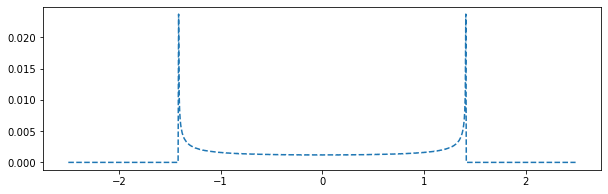

In [14]:
fig = plt.figure(figsize = (10, 3))
plt.plot(centers, prob, linestyle = '--')